<a href="https://colab.research.google.com/github/BureddySaiPoojitha/probabilty-second-lab-/blob/main/Probability_second_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Statistics and Probability: Fundamentals**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

## **Probability**

In [ ]:
def toss_a_coin(no_of_tosses=500):
  return pd.Series(np.random.choice(['Heads','Tails'],no_of_tosses))
def throwing_a_dice(no_of_throws=500):
  return pd.Series(np.random.choice([1,2,3,4,5,6],no_of_throws))

In [ ]:
results=toss_a_`coin()
print(results.value_counts())
fig=pg.Figure([pg.Bar(x=results.value_counts().index,y=results.value_counts())])
fig.show()

Tails    257
Heads    243
Name: count, dtype: int64


# **Derived Probability Distributions**

In [ ]:
results=pd.Series([np.sum(toss_a_coin(30)=='Tails') for _ in range(1000)])
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

In [ ]:
results=pd.Series([np.sum(toss_a_coin(1000)=='Heads')for _ in range(3000)])
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

## **Sample**

In [ ]:
results={shots:throwing_a_dice(shots) for shots in [10,50,100,1000,1500,100000,150000]}
fig=pg.Figure([pg.Bar(x=result.value_counts().keys(),y=result.value_counts().values/shots,)
                      for shots,result in results.items()])
fig.add_shape(type='line',x0=0.5,y0=1/6,x1=6.5,y1=1/6,line=dict(color='Blue',))
fig.show()

1.If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

In [ ]:
total_cards = 52
number_cards = 4 * 9
p_number_card = number_cards / total_cards
print(p_number_card)


0.6923076923076923


2.In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

In [ ]:
p_first_number_card = number_cards / total_cards
p_second_number_card = number_cards / total_cards
p_both_number_cards = p_first_number_card * p_second_number_card
print(p_both_number_cards)


0.4792899408284023


3.Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

In [ ]:
p_first_number_card = number_cards / total_cards
p_second_number_card = (number_cards - 1) / (total_cards - 1)
p_no_replace = p_first_number_card * p_second_number_card
print(p_no_replace)


0.4751131221719457


4.Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

In [116]:
p_bottom_card_numbered = number_cards / total_cards
print(p_bottom_card_numbered)


0.6923076923076923


# **Simulating to compute Expectation**

In [48]:
import numpy as np
def no_of_numbered_cards_drawn_before_ace(trails=80,shown_trails=5):
    values=['A','2','3','4','5','6','7','8','9','10','J','Q','K']
    suits=['S','H','D','C']
    cards_thrown_list=[]
    for i in range(trails):
        deck_of_cards=[value+suit for value in values for suit in suits]
        cards_thrown=0
        cards_pile=[]
        while len(deck_of_cards)>0:
          picked_card=np.random.choice(deck_of_cards)
          cards_pile.append(picked_card)

          if picked_card[0]=='A':
              break
          cards_thrown+=1
          deck_of_cards.remove(picked_card)
          if i<shown_trails:
              print(cards_thrown,'cards were thrown:',' '.join(cards_pile))

        cards_thrown_list.append(cards_thrown)
    return np.mean(cards_thrown_list),cards_thrown_list

expected_cards_thrown,cards_thrown=no_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')


1 cards were thrown: 3H
2 cards were thrown: 3H 9D
3 cards were thrown: 3H 9D 2D
4 cards were thrown: 3H 9D 2D 4S
5 cards were thrown: 3H 9D 2D 4S 5C
6 cards were thrown: 3H 9D 2D 4S 5C 2C
7 cards were thrown: 3H 9D 2D 4S 5C 2C KC
8 cards were thrown: 3H 9D 2D 4S 5C 2C KC 9C
1 cards were thrown: 7C
2 cards were thrown: 7C 5C
3 cards were thrown: 7C 5C 7H
4 cards were thrown: 7C 5C 7H KH
5 cards were thrown: 7C 5C 7H KH 7S
6 cards were thrown: 7C 5C 7H KH 7S JS
7 cards were thrown: 7C 5C 7H KH 7S JS 9S
8 cards were thrown: 7C 5C 7H KH 7S JS 9S JH
9 cards were thrown: 7C 5C 7H KH 7S JS 9S JH 4D
10 cards were thrown: 7C 5C 7H KH 7S JS 9S JH 4D 3H
11 cards were thrown: 7C 5C 7H KH 7S JS 9S JH 4D 3H 9H
12 cards were thrown: 7C 5C 7H KH 7S JS 9S JH 4D 3H 9H 4S
13 cards were thrown: 7C 5C 7H KH 7S JS 9S JH 4D 3H 9H 4S 3C
1 cards were thrown: 6S
2 cards were thrown: 6S 5H
3 cards were thrown: 6S 5H 3S
4 cards were thrown: 6S 5H 3S 3D
1 cards were thrown: 2C
1 cards were thrown: 10C
2 cards wer

**Probability Mass Function**

In [49]:
results=pd.Series(cards_thrown)
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

# **Mean Squared Error**

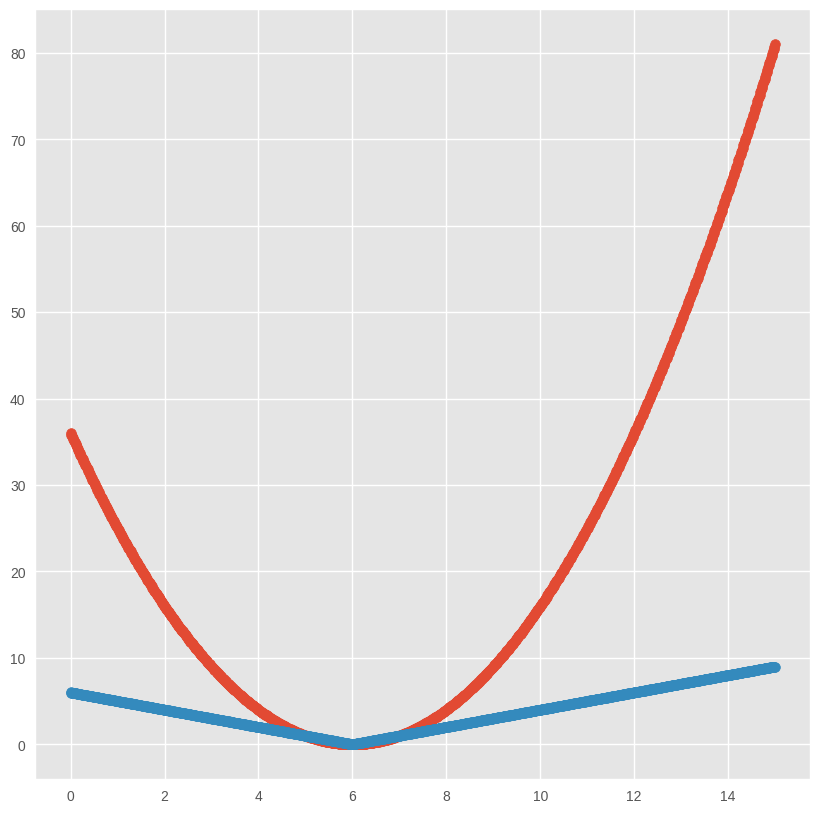

In [56]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
measurements=np.linspace(0,15,1000)
plt.scatter(measurements,(measurements-6)**2,label='Squared Error')
plt.scatter(measurements,np.abs(measurements-6),label='Absolute Error')
plt.show()

# **Standradisation**

      Name   Physics   Biology     Maths
0    Alice -0.295652 -1.486769 -0.158851
1      Bob  0.525603 -0.029152  0.547153
2  Charlie -1.445410 -0.757961 -0.864856
3    David  0.854106  0.553894  1.253158
4      Eve  0.197101  1.428464  0.370652
5    Frank -1.773912 -0.466437 -2.100363
6    Grace  1.346859 -1.341007  0.017650
7   Hannah  0.361352  0.699656 -0.688354
8    Isaac -0.459903  0.262371  0.723655
9     Jack  0.689855  1.136941  0.900156


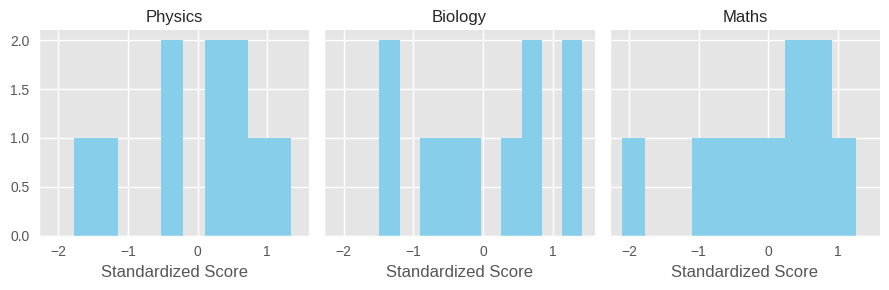

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Isaac', 'Jack'],
    'Physics': [85, 90, 78, 92, 88, 76, 95, 89, 84, 91],
    'Biology': [75, 85, 80, 89, 95, 82, 76, 90, 87, 93],
    'Maths': [88, 92, 84, 96, 91, 77, 89, 85, 93, 94]
}
grades = pd.DataFrame(data)
grades_standardized = grades.copy()
for subject in ['Physics', 'Biology', 'Maths']:
    mean = grades[subject].mean()
    std = grades[subject].std()
    grades_standardized[subject] = (grades[subject] - mean) / std
print(grades_standardized[['Name', 'Physics', 'Biology', 'Maths']])
g = sns.FacetGrid(grades_standardized.melt(id_vars="Name"), col="variable")
g.map(plt.hist, "value", bins=10, color="skyblue")
g.set_axis_labels("Standardized Score")
g.set_titles(col_template="{col_name}")
plt.show()


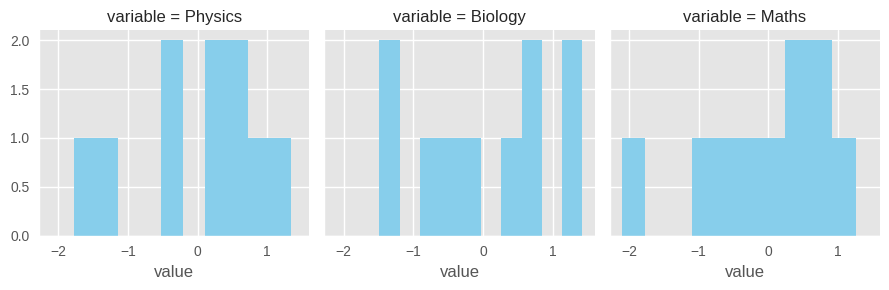

In [112]:
g=sns.FacetGrid(grades_standardized.melt(id_vars="Name"),col="variable")
g.map(plt.hist,"value",bins=10,color="skyblue")

In [113]:
grades["Physics_std"]=(grades["Physics"]-grades["Physics"].mean())/grades["Physics"].std()

In [114]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Alice,85,75,88,-0.295652
1,Bob,90,85,92,0.525603
2,Charlie,78,80,84,-1.445410
3,David,92,89,96,0.854106
4,Eve,88,95,91,0.197101


In [115]:
grades["Maths_std"]=(grades["Maths"]-grades["Maths"].mean())/grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Alice,85,75,88,-0.295652,-0.158851
1,Bob,90,85,92,0.525603,0.547153
2,Charlie,78,80,84,-1.445410,-0.864856
3,David,92,89,96,0.854106,1.253158
4,Eve,88,95,91,0.197101,0.370652


**Binomial Distribution**

In [77]:
from scipy.stats import binom

In [79]:
binom.pmf(k=10,n=20,p=0.5)

0.17619705200195296

In [80]:
1 - binom.pmf(k=6,n=3,p=1)-binom.pmf(k=10,n=3,p=1)

1.0

In [81]:
binom.cdf(3,n=5,p=1)

0.0

**Normal Distribution**

In [82]:
from scipy.stats import norm

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning:

divide by zero encountered in divide



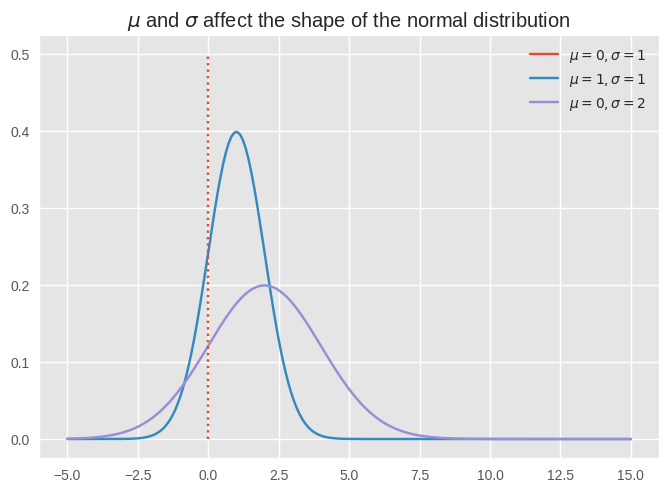

In [84]:
x = np.linspace(-5, 15, 200)
f1 = norm.pdf(x, loc=0, scale=0)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=2, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

**Programmatic solutions: percent point function**

In [86]:
norm.cdf(1)

0.8413447460685429

In [87]:
norm.ppf(0.7)

0.5244005127080407

**Example: height**

In [88]:
norm.ppf(0.93,loc=178.33,scale=8)

190.13632822543337

In [89]:
178.33+8

186.33

In [90]:
norm.ppf(0.99,loc=178.33,scale=8)

196.94078299232675

In [91]:
178.33+8*2

194.33

In [92]:
norm.ppf(0.001,loc=178.33,scale=8)

153.6081415506575

In [93]:
178.33-3*8

154.33

**Poisson distribution**

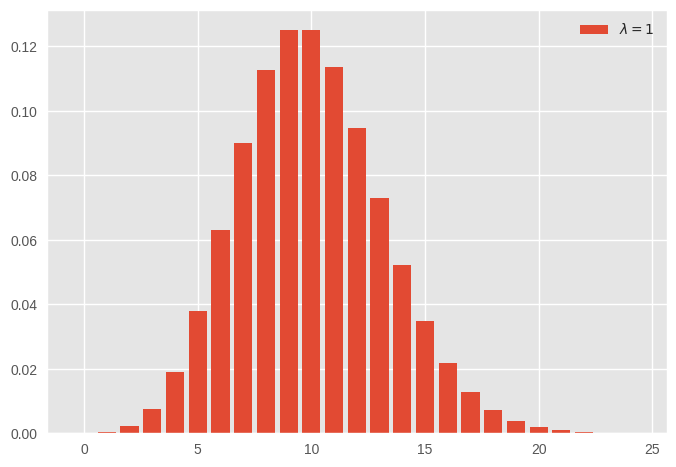

In [94]:
from scipy.stats import poisson
x=np.arange(25)
f1=poisson.pmf(x,mu=10)
f2=poisson.pmf(x,mu=20)
f3=poisson.pmf(x,mu=30)
plt.bar(x,f1,label='$\lambda=1$')

plt.legend()

In [95]:
x@f1

9.998798778460523

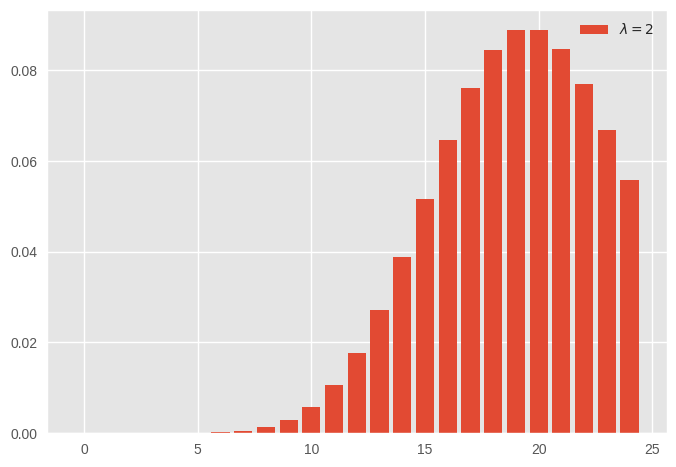

In [96]:
plt.bar(x,f2,label='$\lambda=2$')
plt.legend()

In [97]:
x@f2

15.749856335768488

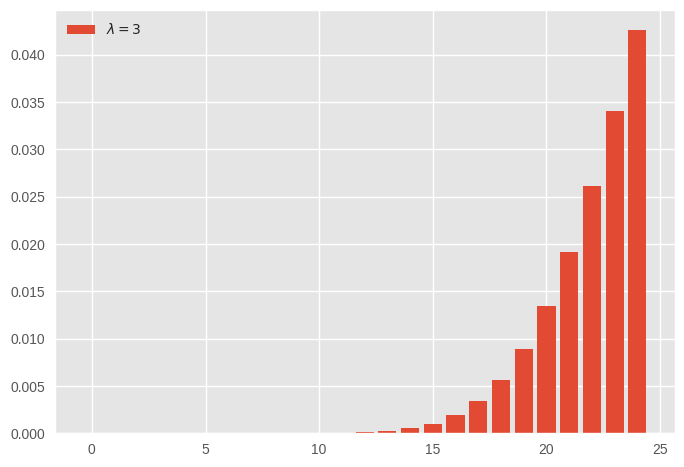

In [98]:
plt.bar(x,f3,label='$\lambda=3$')
plt.legend()

In [99]:
x@f3

3.4393773814282147

In [100]:
poisson.ppf(8,11)

nan

Central Limit Theorem

<BarContainer object of 30 artists>

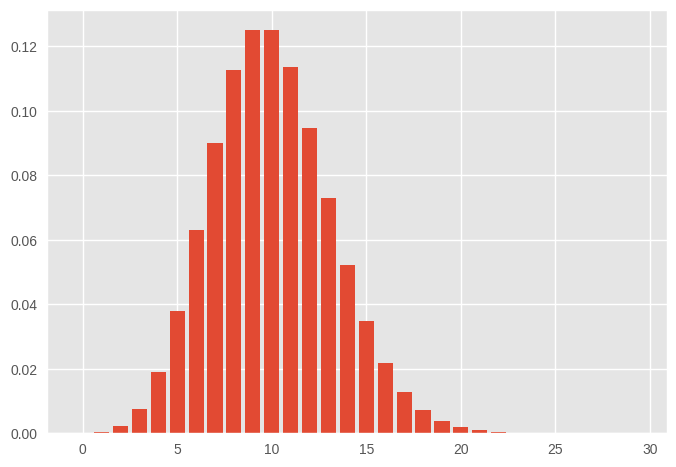

In [101]:
from scipy.stats import poisson
bins=np.arange(0,30)
p_pois=poisson.pmf(bins,mu=10)
plt.bar(bins,p_pois)

(array([  3.,   9.,  38., 119., 208., 253., 198., 119.,  37.,  16.]),
 array([ 8.92 ,  9.115,  9.31 ,  9.505,  9.7  ,  9.895, 10.09 , 10.285,
        10.48 , 10.675, 10.87 ]),
 <BarContainer object of 10 artists>)

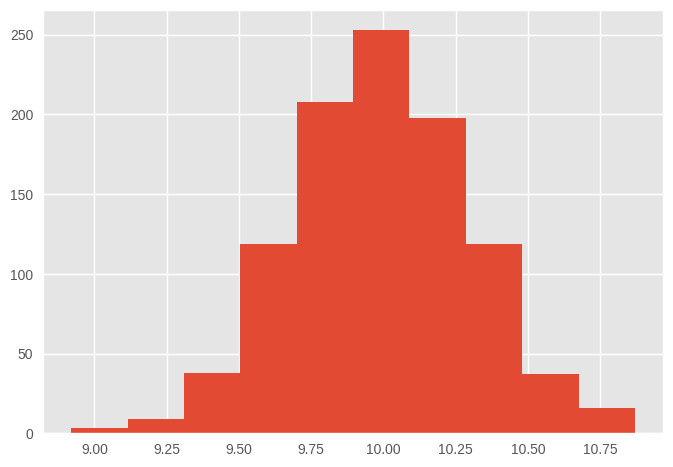

In [103]:
def sample_pois(_):
  samples=poisson.rvs(mu=10,size=100)
  return np.mean(samples)
means=list(map(sample_pois,np.arange(1000)))
plt.hist(means)